Find the best degree of the polynomial based on the MSE values using validation set.

In [1]:
#import the requires libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv("/Users/karnikabhardwaj/Downloads/dataset.csv")

df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [7]:
# assign the values of the x and y column as the predictor and response variable
x = df[['x']].values
y = df.y.values

Train - Validation split

In [9]:
#split the dataset into train and validation sets with 75% training data and set random state as 1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size = 0.75, random_state = 1)

Computing the train and validation error in terms of MSE

In [15]:
# maximum degree
maxdeg = 14

#create two empty lists to store training and validatio MSEs
training_error, validation_error = [], []

#loop through the degrees of the polynomial to create the different models
for d in range(maxdeg):
    
    # compute the polynomial features for the current degree of the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)
    
    #compute the polynomial features of the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    #intialize a linear regression model
    lreg = LinearRegression(fit_intercept = False)
    
    #fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    #use the trained model to predict the transformed train data
    y_train_pred = lreg.predict(x_poly_train)
    
    #use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    #compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))
    
    #compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))
                                                  

Find the best degree

In [28]:
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

print("The best degree of the model is ", best_degree)

The best degree of the model is  2


Plotting the error graph

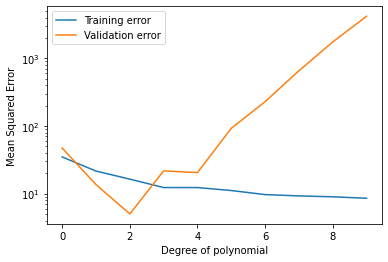

In [29]:
fig, ax = plt.subplots()

#plot the training error
ax.plot(training_error, label = "Training error")

#plot the validation error
ax.plot(validation_error, label = "Validation error")

#set the plot labels and legends
ax.set_xlabel("Degree of polynomial")
ax.set_ylabel("Mean Squared Error")
ax.legend(loc = "best")
ax.set_yscale("log")
plt.show()

Find the best degree of the polynomial based on the MSE values using cross- validation.

In [30]:
from sklearn.model_selection import cross_validate

Computing the MSE

In [31]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(maxdeg):
    
    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(d).fit_transform(x)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(d).fit_transform(x_val)

    # Initialize a Linear Regression object
    lreg = LinearRegression(fit_intercept = False)
  
    # Fit model on the training set
    lreg.fit(x_poly_train,y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    # Perform cross-validation on the entire data with 10 folds and 
    # get the mse_scores
    mse_score = cross_validate(estimator=lreg, X=x_poly, y=y, scoring="neg_mean_squared_error", cv = 10, return_train_score = True)

    # Compute the mean of the cross validation error and store in list 
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(-1*np.mean(mse_score['test_score']))
    

In [32]:
# we keep fit_intercept = False because it will refrain adding redundant information to our design matrix.

In [33]:
# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


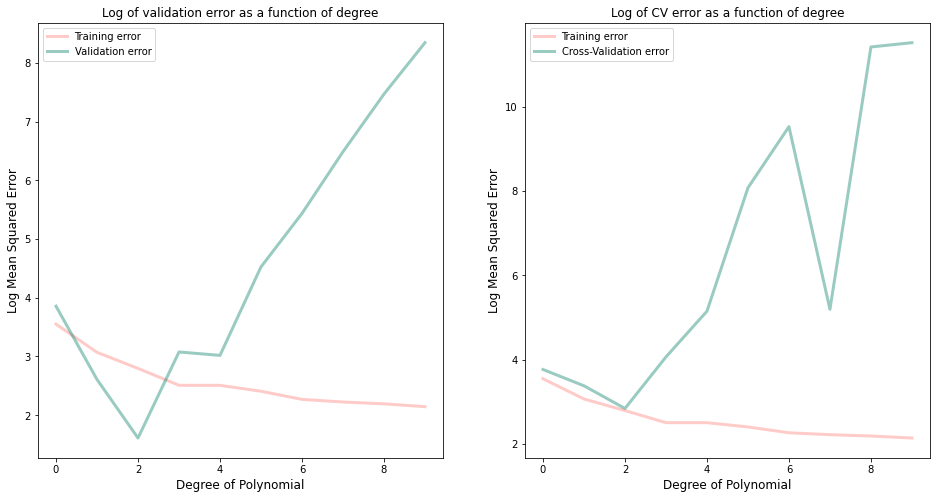

In [34]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();
